In [201]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
from time import sleep 
import scrapy
import random
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
import time
from pandas import ExcelWriter
import xlsxwriter
import openpyxl
from openpyxl import workbook

In [21]:
import pandas as pd
import os 
import re
from wordcloud import WordCloud

# Leemos los datos
papers = pd.read_excel('DatosInvestigacion-CargaCompleta.xlsx')
# Imprimimos los datos
papers.head()

,ID,TITULO,MES,AÑO,AUTORES,REVISTA,CITACIONES,REFERENCIAS
0,1,Security modelling and assessment of modern ne...,Dec15,2019,"Enoch, SY; Hong, JB and Kim, DS",JOURNAL OF NETWORK AND COMPUTER APPLICATIONS,5,52
1,2,Formalization of security patterns as a means ...,Feb,2015,"Varela-Vaca, AJ and Gasca, RM",LOGIC JOURNAL OF THE IGPL,5,32
2,3,Catalytic Decomposition of N2O over Co-Ti Oxid...,Jun21,2016,"Zhang, C; Zhang, ZP; (...); Zhu, YJ",CHEMCATCHEM,26,56
3,4,Security of electronic personal health informa...,Mar4,2022,"Chuma, KG and Ngoepe, M",INFORMATION SECURITY JOURNAL,1,59
4,5,Reversible Fluorescence Switching of Metal-Org...,Apr24,2020,"Venkateswarlu, S; Reddy, AS; (...); Yoon, MY",ACS APPLIED NANO MATERIALS,23,41


In [10]:
# Eliminamos las columnas
papers = papers.drop(columns=['ID', 'MES', 'AÑO', 'AUTORES', 'CITACIONES', 'REFERENCIAS'], axis=1).sample(100)
# Imprimimos
papers.head()

,TITULO,REVISTA
34,"Excitation functions of the Cr-nat(p,x)Ti-44, ...",NUCLEAR INSTRUMENTS & METHODS IN PHYSICS RESEA...
296,Scaling behavior of ultrafast two-color terahe...,OPTICS EXPRESS
477,Crohn's and Colitis Foundation of America Part...,MEDICAL CARE
160,Subsurface Cooling Rates and Microstructural R...,SCIENTIFIC REPORTS
575,Impact of hydrostatic pressure on the crystal ...,DALTON TRANSACTIONS


In [20]:
# Quitar 
papers['TITULO_processed'] = \
papers['TITULO'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convertir los títulos a minúsculas 
papers['TITULO_processed'] = \
papers['TITULO'].map(lambda x: x.lower())
# Imprime las primeras filas de papeles 
papers['TITULO_processed'].head()



34     excitation functions of the cr-nat(p,x)ti-44, ...
296    scaling behavior of ultrafast two-color terahe...
477    crohn's and colitis foundation of america part...
160    subsurface cooling rates and microstructural r...
575    impact of hydrostatic pressure on the crystal ...
Name: TITULO_processed, dtype: object

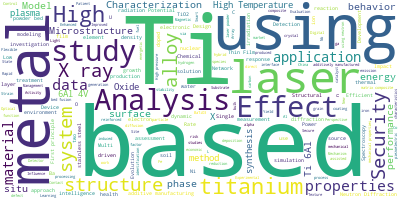

In [25]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['TITULO'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [28]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.TITULO.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['security', 'modelling', 'assessment', 'modern', 'networks', 'using', 'time', 'independent', 'graphical', 'security', 'models']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
